# Loan default prediction project

In [77]:
#importing dataset
import pandas as pd
loan=pd.read_excel("loan.xlsx")

In [78]:
#finding missing values
loan.isna().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [79]:
#filling missing values in a column with mode(since it is a categorical variable)
loan["Employment.Type"].fillna(value=loan["Employment.Type"].mode()[0],inplace=True)

In [80]:
#checking missing values again
loan.isna().sum()

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALA

In [81]:
#renaming some of the column names
loan.rename(columns={"Date.of.Birth":"Date_of_birth",
                     "Employment.Type":"Employment_type"},inplace=True)

In [82]:
loan.size

9559314

In [83]:
#info about each column
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UniqueID                             233154 non-null  int64         
 1   disbursed_amount                     233154 non-null  int64         
 2   asset_cost                           233154 non-null  int64         
 3   ltv                                  233154 non-null  float64       
 4   branch_id                            233154 non-null  int64         
 5   supplier_id                          233154 non-null  int64         
 6   manufacturer_id                      233154 non-null  int64         
 7   Current_pincode_ID                   233154 non-null  int64         
 8   Date_of_birth                        233154 non-null  datetime64[ns]
 9   Employment_type                      233154 non-null  object        
 

In [8]:
#statistical description of quantitative variables
loan.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [9]:
#finding duplicates
duplicate=loan[loan.duplicated()]

In [10]:
duplicate

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date_of_birth,Employment_type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default


There are no duplicates in this data


C:\Users\Vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_default', ylabel='count'>

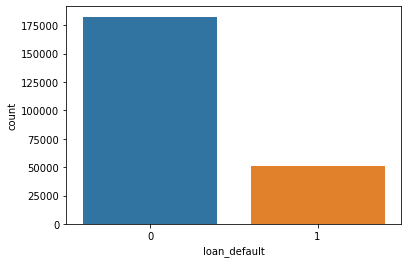

In [11]:
#distribution of target variable overall
import seaborn as sns
sns.countplot(loan["loan_default"])

In [12]:
#Employment type details:
loan["Employment_type"].value_counts()

Self employed    135296
Salaried          97858
Name: Employment_type, dtype: int64

C:\Users\Vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_default', ylabel='count'>

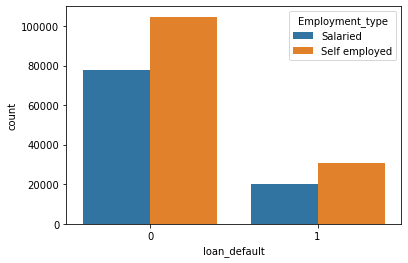

In [13]:
#the different types of employment that define the defaulters and non-defaulters.
sns.countplot(loan["loan_default"],hue=loan["Employment_type"])

<AxesSubplot:xlabel='loan_default', ylabel='branch_id'>

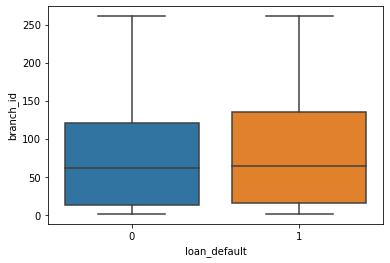

In [14]:
#distribution of the target variable across various categories like branch,state,supplier,manufacturer
sns.boxplot(data=loan,y='branch_id',x='loan_default')

<AxesSubplot:xlabel='loan_default', ylabel='State_ID'>

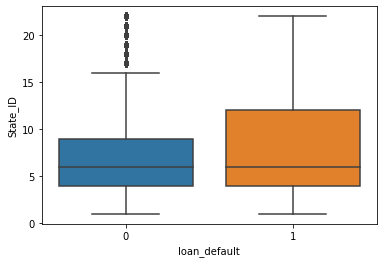

In [15]:
sns.boxplot(data=loan,y='State_ID',x='loan_default')

<AxesSubplot:xlabel='loan_default', ylabel='supplier_id'>

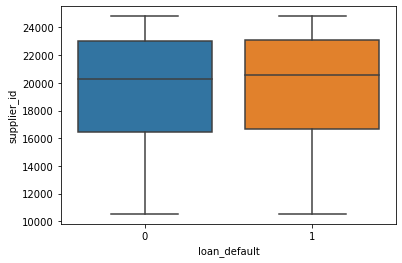

In [16]:
sns.boxplot(data=loan,y='supplier_id',x='loan_default')

<AxesSubplot:xlabel='loan_default', ylabel='manufacturer_id'>

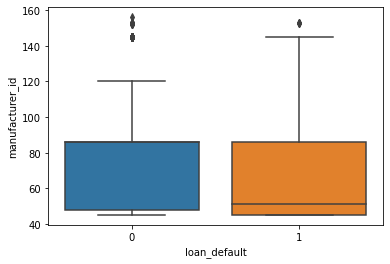

In [17]:
sns.boxplot(data=loan,y='manufacturer_id',x='loan_default')

In [18]:
#finding age from date of birth and disbursal date
loan["age"]=loan["DisbursalDate"]-loan["Date_of_birth"]

In [19]:

loan.head(5)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date_of_birth,Employment_type,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,age
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,12633 days
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,12030 days
2,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,14901 days
3,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,Salaried,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,11071 days
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,Self employed,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,8852 days


In [20]:
#converting into years
import numpy as np
loan["age"]=loan["DisbursalDate"]-loan["Date_of_birth"]
loan["age"]=loan["age"]/np.timedelta64(1,'Y')

In [21]:
loan.head(5)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date_of_birth,Employment_type,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,age
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,34.587979
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,32.937021
2,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,40.797552
3,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,Salaried,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,30.311368
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,Self employed,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,24.235953


C:\Users\Vijay\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

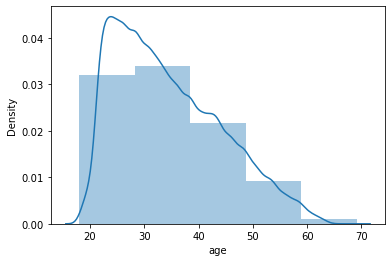

In [22]:
#distribution of age
sns.distplot(loan["age"],bins=5)

<AxesSubplot:xlabel='loan_default', ylabel='age'>

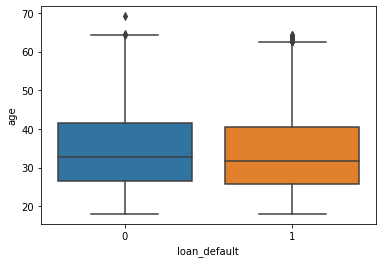

In [23]:
#the distribution of age w.r.t. to the defaulters and non-defaulters
import seaborn as sns
sns.boxplot(data=loan,y='age',x='loan_default')

In [24]:
# finding the type of ID was presented by most of the customers for proof
loan["MobileNo_Avl_Flag"].value_counts()

1    233154
Name: MobileNo_Avl_Flag, dtype: int64

In [25]:
loan["Aadhar_flag"].value_counts()

1    195924
0     37230
Name: Aadhar_flag, dtype: int64

In [26]:
loan["PAN_flag"].value_counts()

0    215533
1     17621
Name: PAN_flag, dtype: int64

In [27]:
loan["VoterID_flag"].value_counts()

0    199360
1     33794
Name: VoterID_flag, dtype: int64

In [28]:
loan["Passport_flag"].value_counts()

0    232658
1       496
Name: Passport_flag, dtype: int64

Thus most of the users given Aadhar as their ID

C:\Users\Vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PERFORM_CNS.SCORE.DESCRIPTION', ylabel='count'>

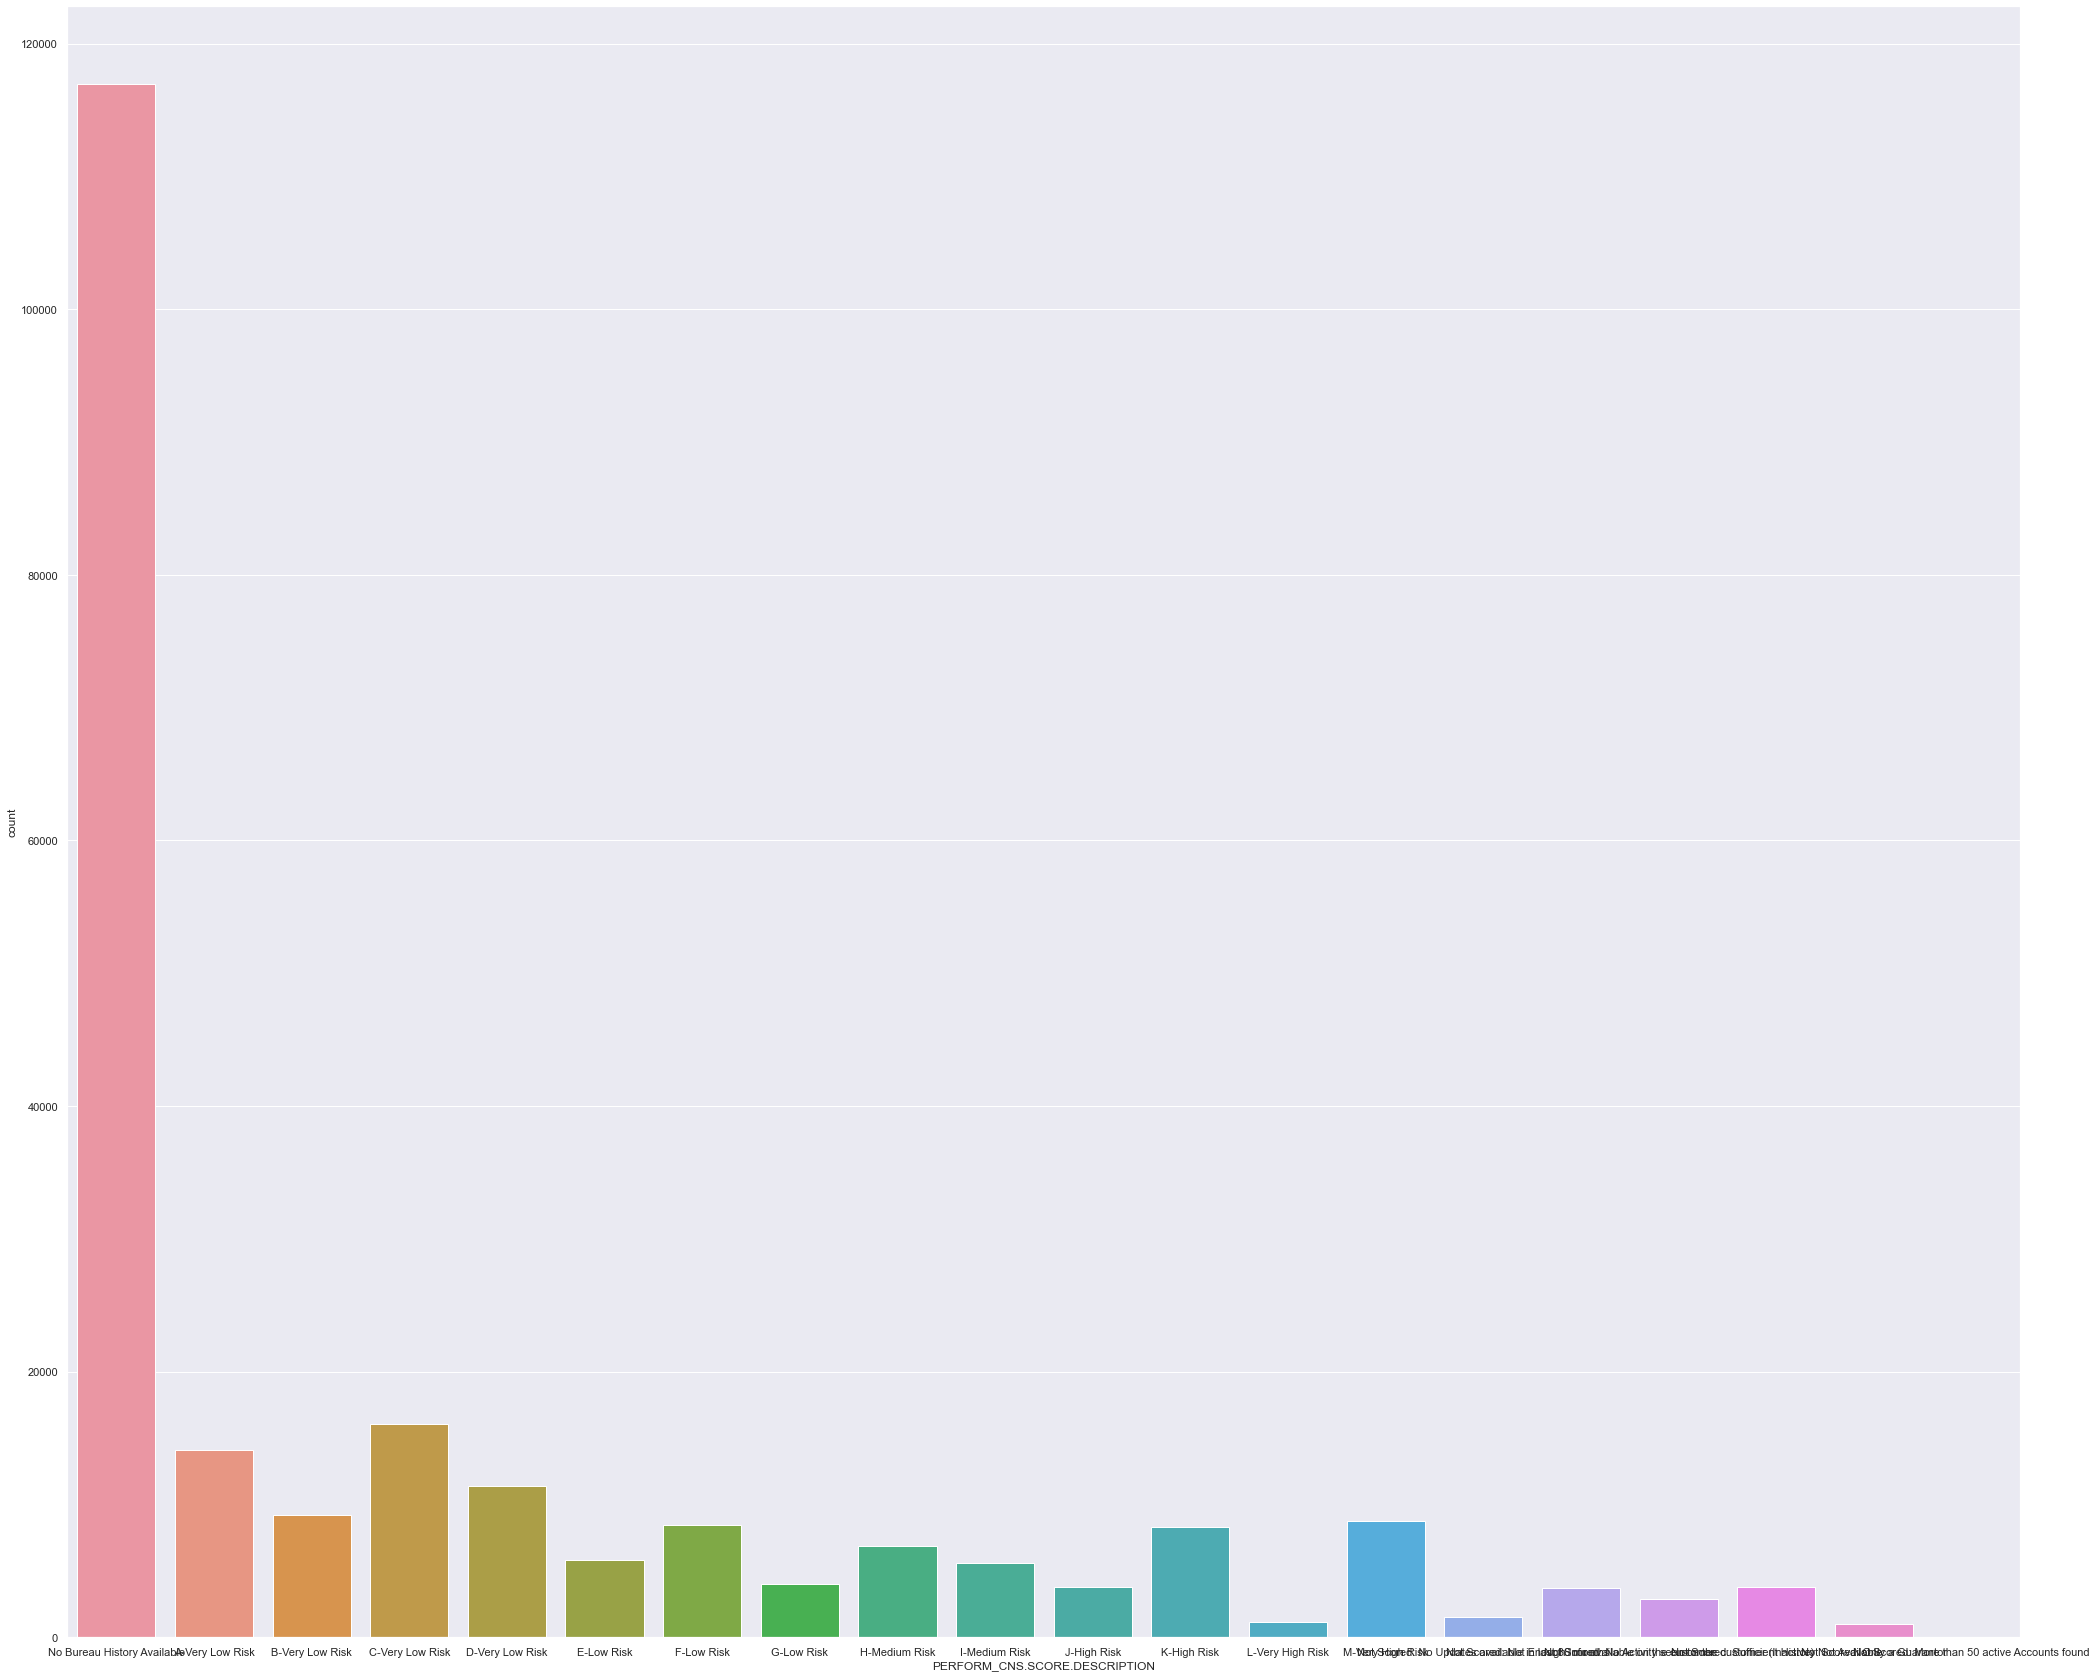

In [29]:
#credit bureau score distribution
sns.set(rc={'figure.figsize':(35,30)})
sns.countplot(loan["PERFORM_CNS.SCORE.DESCRIPTION"])

In [30]:
loan["PERFORM_CNS.SCORE.DESCRIPTION"].value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

C:\Users\Vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PERFORM_CNS.SCORE.DESCRIPTION', ylabel='count'>

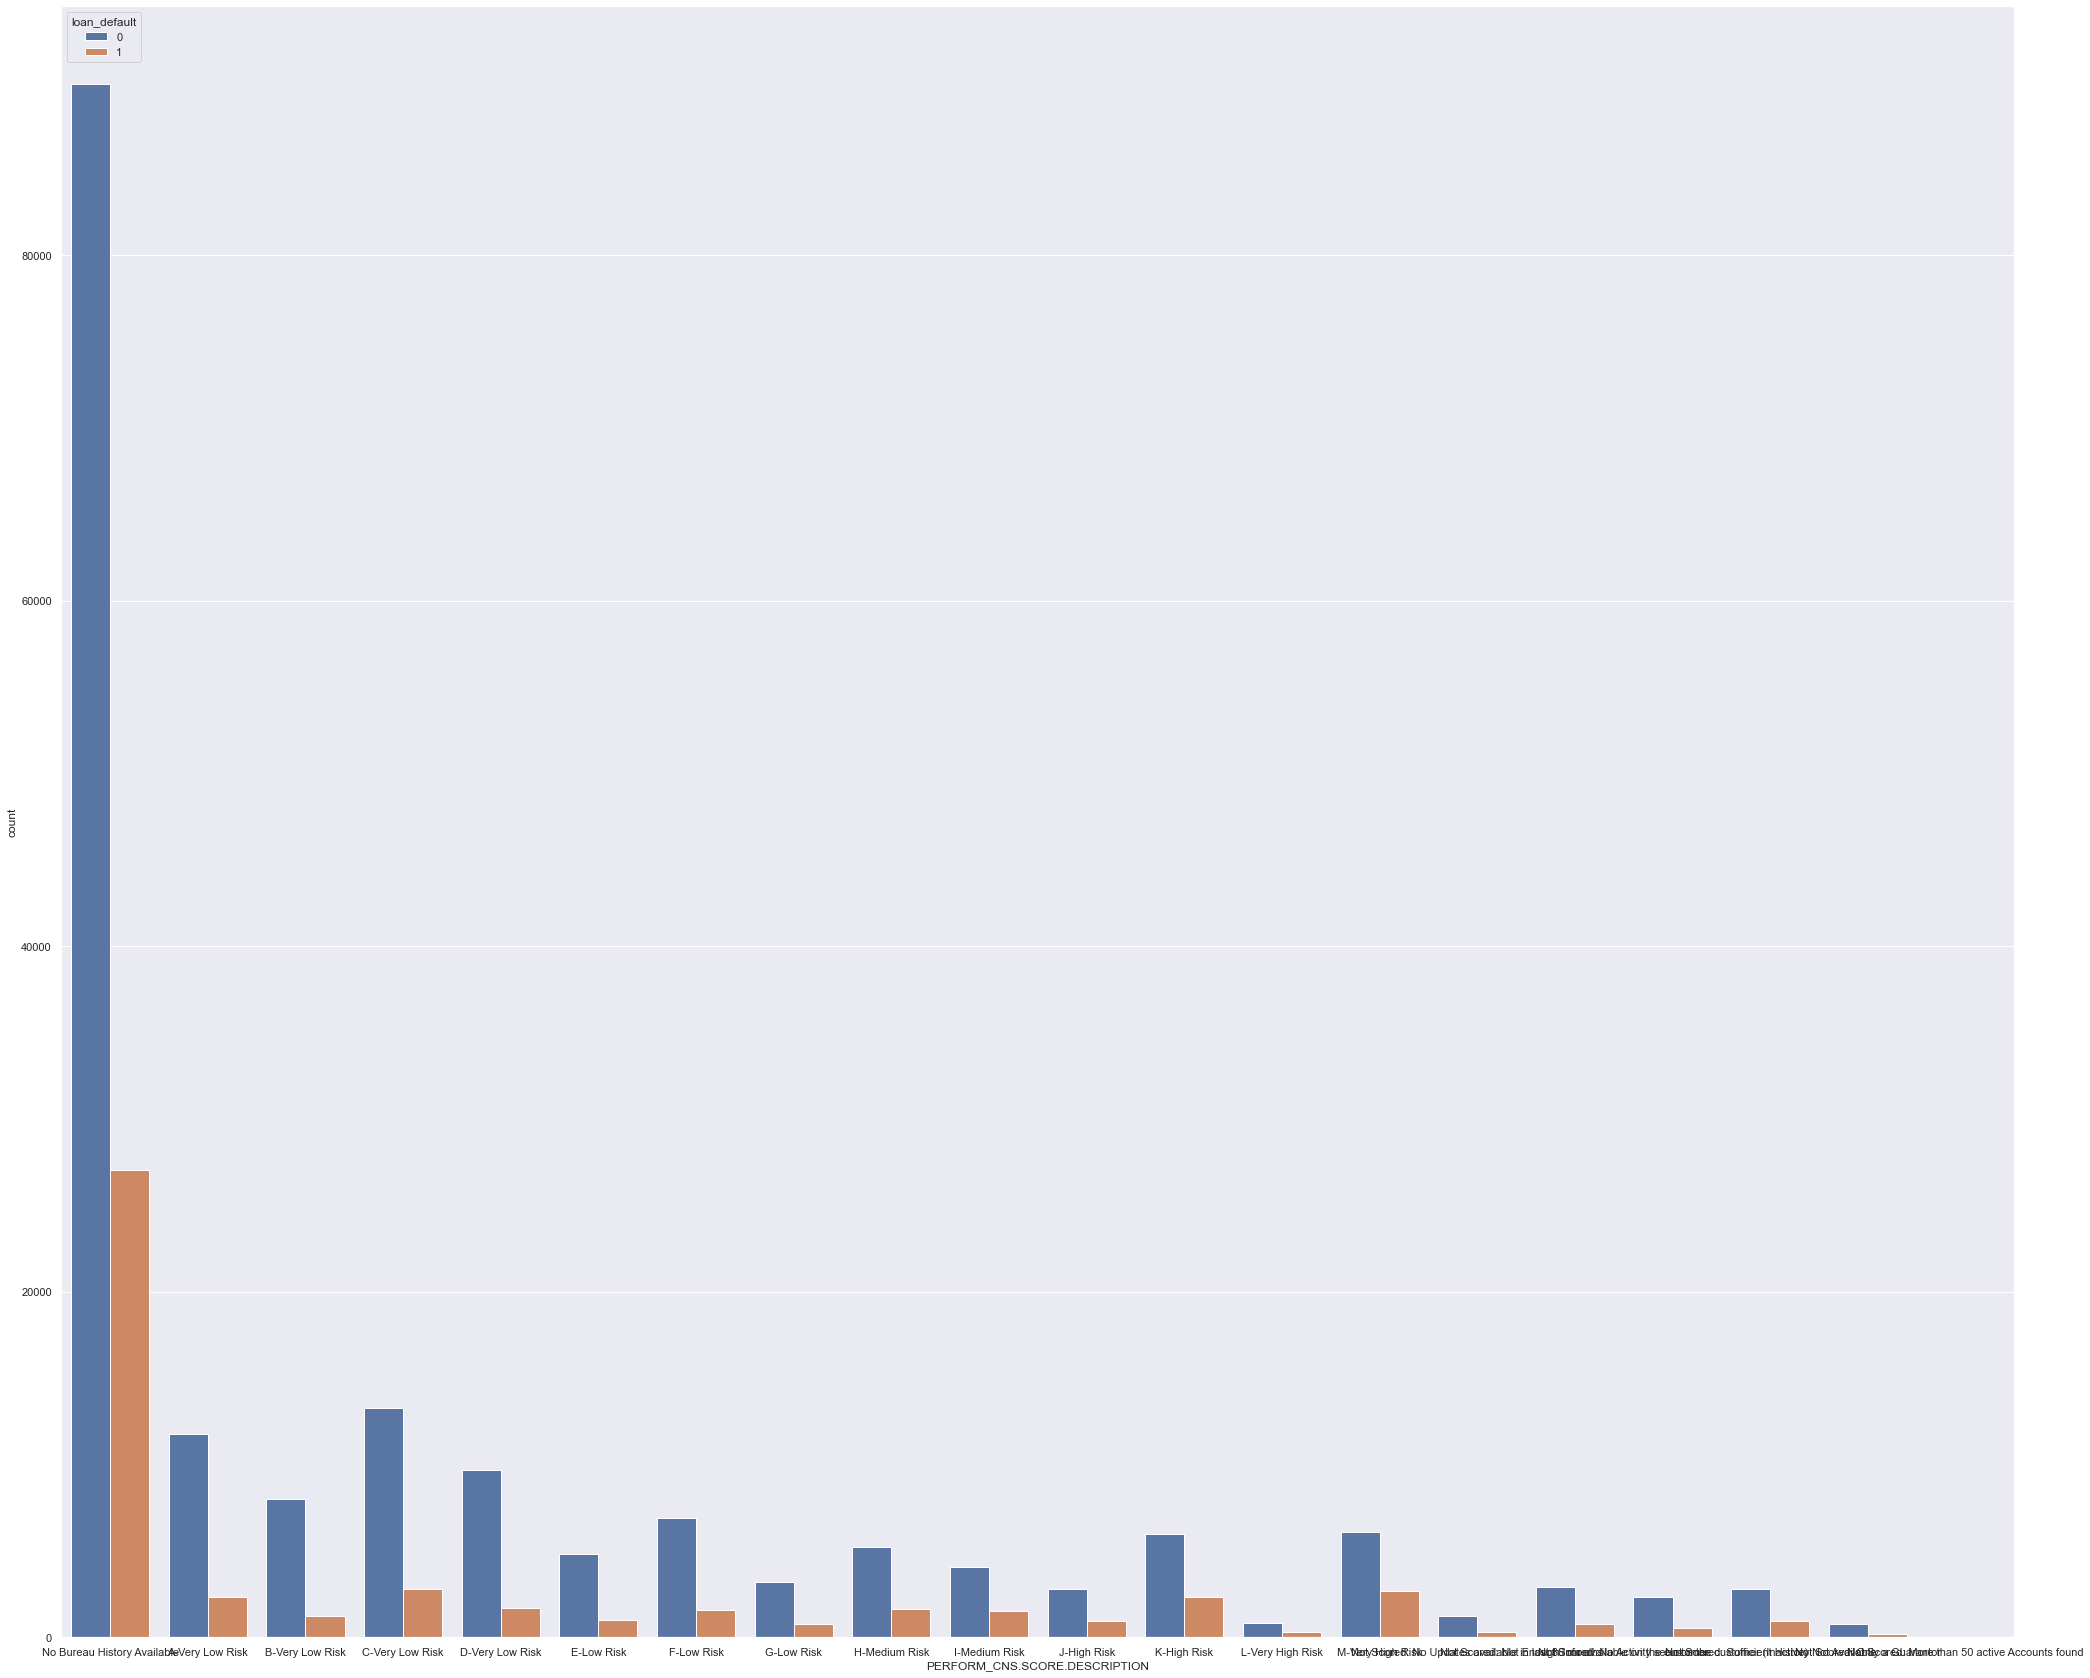

In [31]:
#credit bureau score distribution for defaulters vs. non-defaulters
sns.set(rc={'figure.figsize':(35,30)})
sns.countplot(loan["PERFORM_CNS.SCORE.DESCRIPTION"],hue=loan["loan_default"])

In [32]:
#finding whether there is difference between the sanctioned and disbursed amount of primary and secondary loans through t-test
import scipy.stats as stats

In [33]:
#for primary loans
_,p_value=stats.ttest_rel(a=loan["PRI.SANCTIONED.AMOUNT"],b=loan["PRI.DISBURSED.AMOUNT"])

In [34]:
print(p_value)

0.07550682707997997


In [35]:
if p_value<0.05:
    print("Reject Ho,There is significant difference between primary loan sanctioned and disbursed")
else:
    print("Accept Ho,There is no significant difference between primary loan sanctioned and disbursed")

Accept Ho,There is no significant difference between primary loan sanctioned and disbursed


In [36]:
#for secondary loans
_,p_value=stats.ttest_rel(a=loan["SEC.SANCTIONED.AMOUNT"],b=loan["SEC.DISBURSED.AMOUNT"])

In [37]:
print(p_value)

2.8873358771164625e-30


In [38]:
if p_value<0.05:
    print("Reject Ho,There is significant difference between secondary loan sanctioned and disbursed")
else:
    print("Accept Ho,There is no significant difference between secondary loan sanctioned and disbursed")

Reject Ho,There is significant difference between secondary loan sanctioned and disbursed


In [39]:
loan["sec_diff_sanc_dis"]=loan["SEC.SANCTIONED.AMOUNT"]-loan["SEC.DISBURSED.AMOUNT"]

In [40]:
loan["sec_diff_sanc_dis"].sum()

27028488

In [41]:
loan["pri_diff_sanc_dis"]=loan["PRI.SANCTIONED.AMOUNT"]-loan["PRI.DISBURSED.AMOUNT"]

In [42]:
loan["pri_diff_sanc_dis"].sum()

102111349

In [52]:
loan.rename(columns={"DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS":"loans_default_sixmonths",
                     "CREDIT.HISTORY.LENGTH":"time_since_firstloan"},inplace=True)

In [57]:
#finding correlation between all variables in the dataset
ld=loan.corr()

<AxesSubplot:>

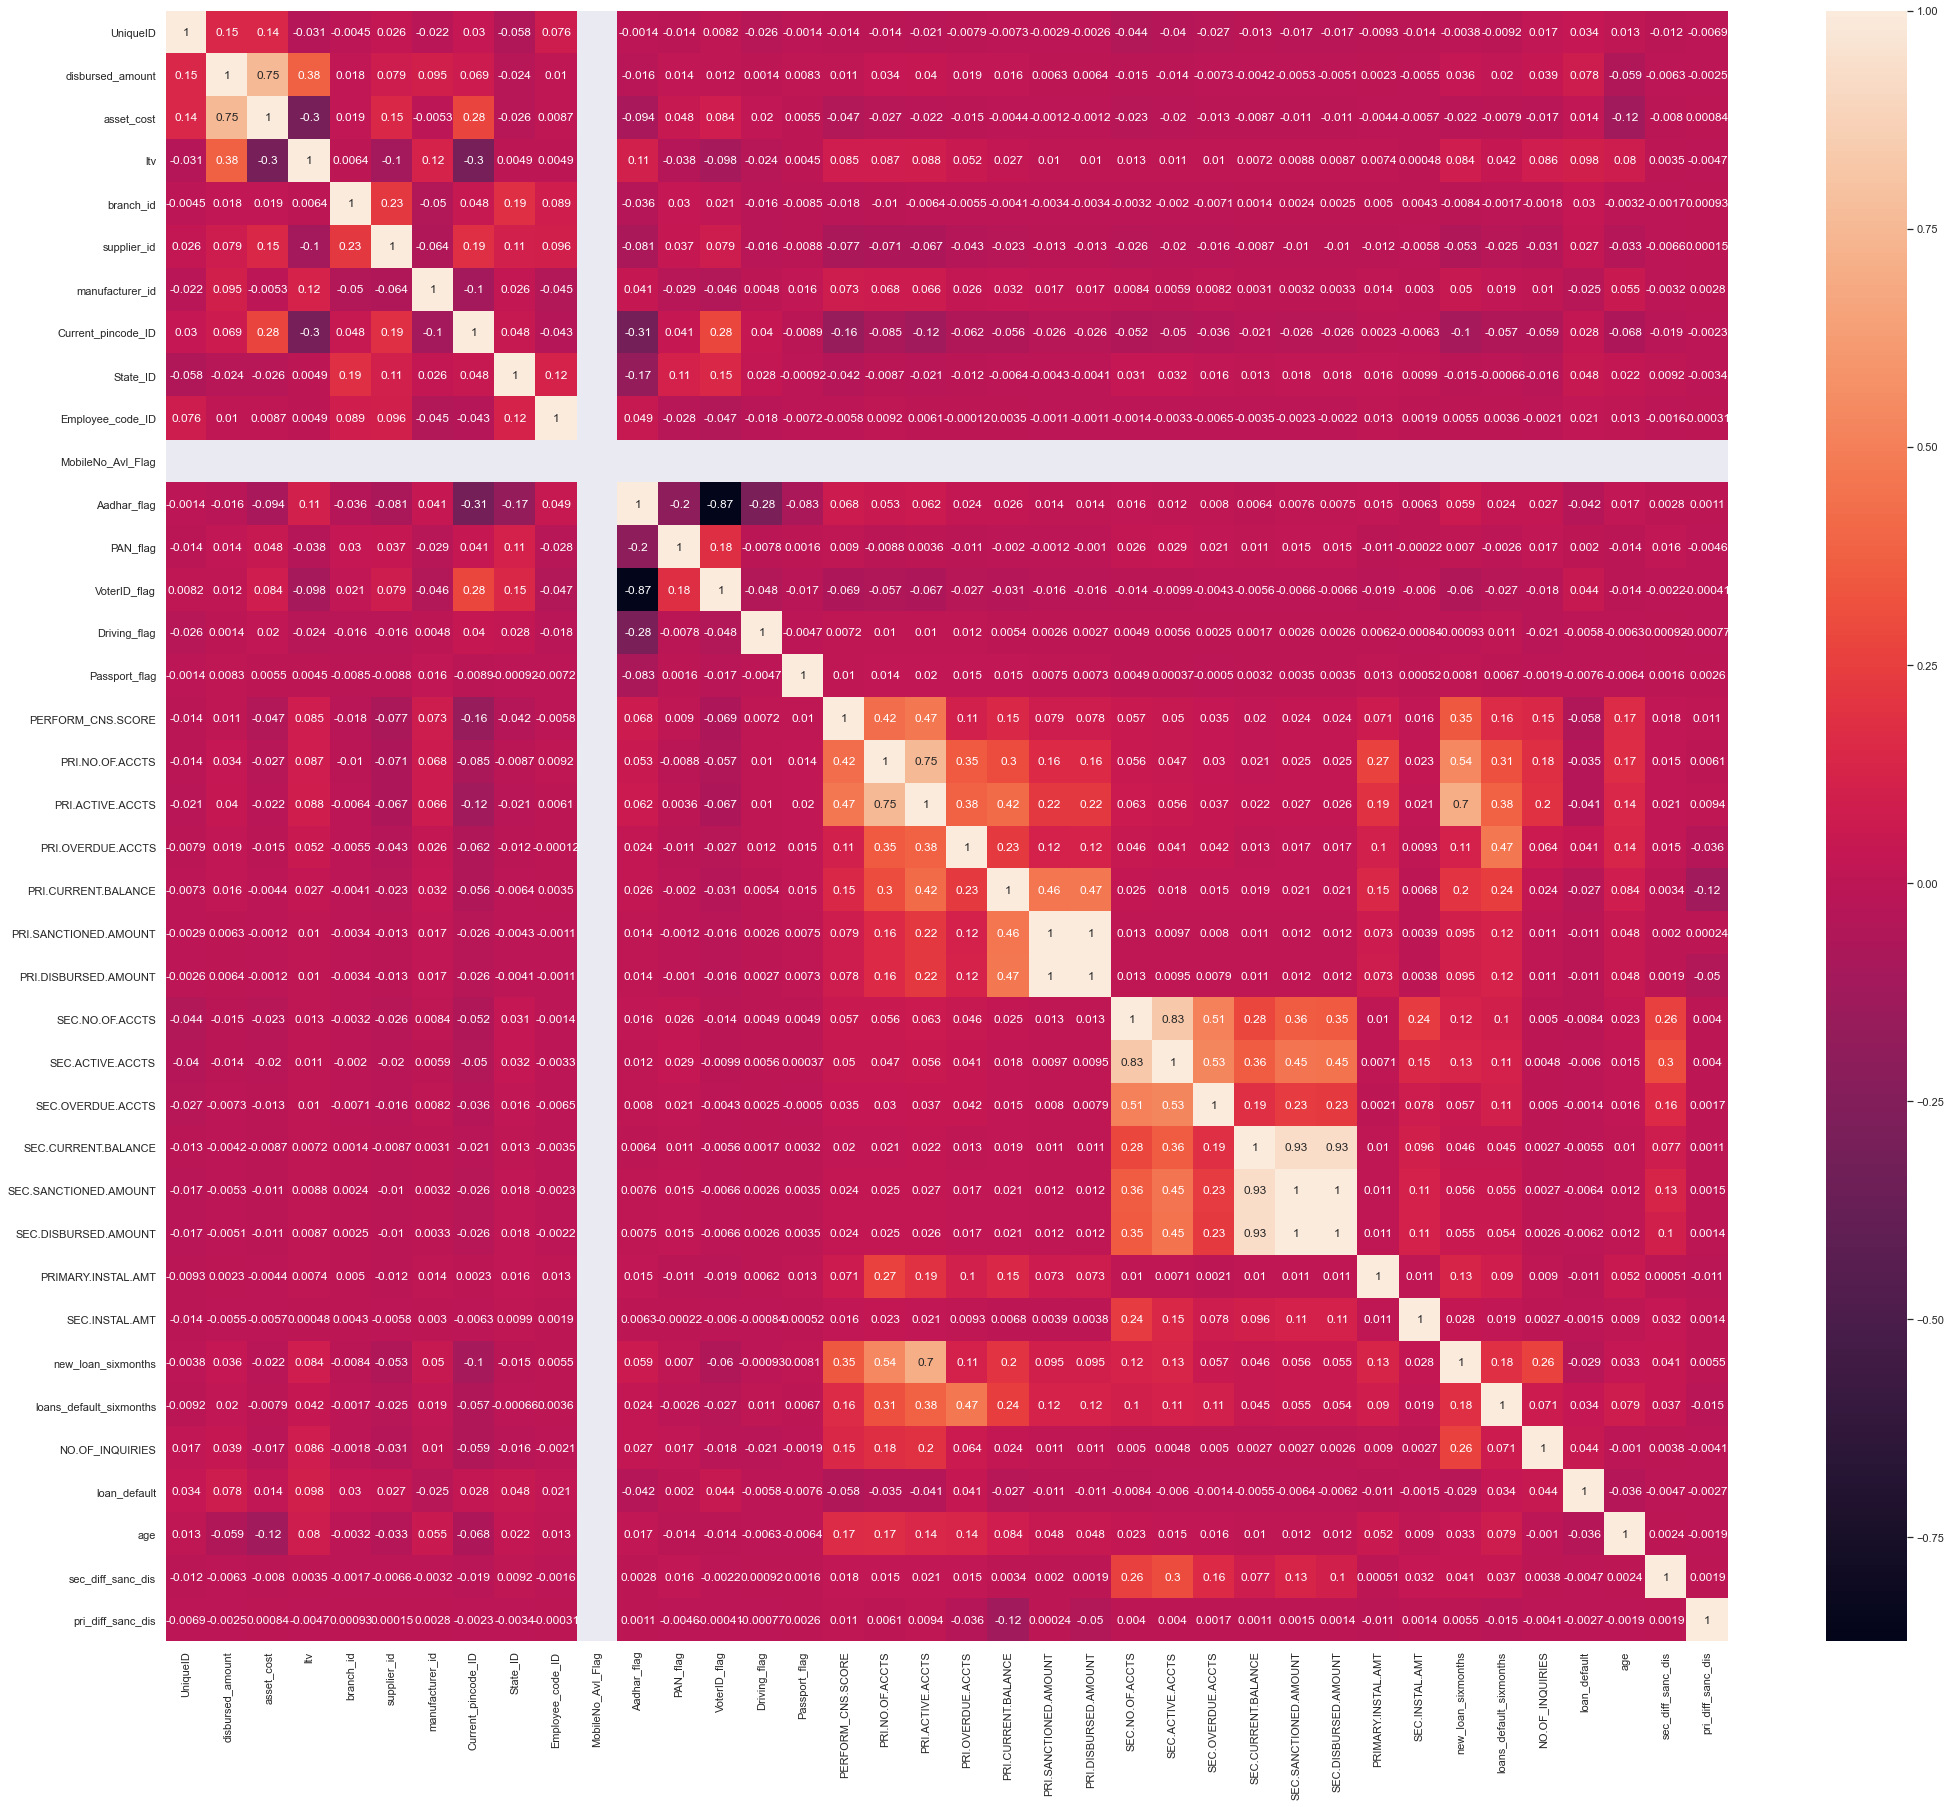

In [58]:
sns.heatmap(ld,annot=True)

#From the correlation heatmap, Primary and secondary accounts,credit history, that is new loans in last six months, loans defaulted in last six months, time since first loan, are not a significant factor in estimating probability of loan defaulters

In [59]:
#Performing logistic Regression
X=loan.iloc[:,[0,1,2,4,5,6,7,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,39]]

In [60]:
y=loan.iloc[:,40]

In [61]:
X.head(2)

,UniqueID,disbursed_amount,asset_cost,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,...,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,new_loan_sixmonths,loans_default_sixmonths,NO.OF_INQUIRIES
0,420825,50578,58400,67,22807,45,1441,1998,1,1,...,0,0,0,0,0,0,0,0,0,0
1,417566,53278,61360,67,22807,45,1497,1998,1,1,...,0,0,0,0,0,0,0,0,0,0


In [62]:
y.head(2)

0    0
1    0
Name: loan_default, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [65]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [66]:
log.fit(X_train,y_train)

C:\Users\Vijay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
loan.dtypes

UniqueID                                  int64
disbursed_amount                          int64
asset_cost                                int64
ltv                                     float64
branch_id                                 int64
supplier_id                               int64
manufacturer_id                           int64
Current_pincode_ID                        int64
Date_of_birth                    datetime64[ns]
Employment_type                          object
DisbursalDate                    datetime64[ns]
State_ID                                  int64
Employee_code_ID                          int64
MobileNo_Avl_Flag                         int64
Aadhar_flag                               int64
PAN_flag                                  int64
VoterID_flag                              int64
Driving_flag                              int64
Passport_flag                             int64
PERFORM_CNS.SCORE                         int64
PERFORM_CNS.SCORE.DESCRIPTION           

In [68]:
log.score(X_test,y_test)

0.7873355178507094

In [69]:
log.coef_

array([[-2.03224437e-06,  2.60925625e-05, -1.56169525e-05,
         3.28421810e-07, -2.22609908e-05, -4.21149847e-07,
         1.70584657e-05,  1.82563665e-06, -3.12927985e-09,
        -7.26694474e-09,  1.51794577e-10,  4.20374044e-09,
        -3.21782103e-10, -8.99051091e-11, -5.66050156e-06,
        -3.86269510e-08, -1.56462489e-08,  6.77441478e-09,
         5.25835453e-08, -4.19856731e-07,  2.31451919e-07,
        -1.38106343e-09, -3.60426766e-10, -8.08209950e-11,
        -3.49256460e-07, -1.61464577e-06,  1.70225882e-06,
        -4.92935780e-07, -9.25522797e-07, -7.40273767e-09,
         4.15799609e-09,  6.75340820e-09]])

In [70]:
log.intercept_

array([-3.12927985e-09])

In [71]:
y_preds=log.predict(X_test)

In [72]:
y_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [73]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [74]:
confusion_matrix(y_test,y_preds)

array([[45893,     6],
       [12390,     0]], dtype=int64)

In [75]:
accuracy_score(y_test,y_preds)

0.7873355178507094

In [76]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     45899
           1       0.00      0.00      0.00     12390

    accuracy                           0.79     58289
   macro avg       0.39      0.50      0.44     58289
weighted avg       0.62      0.79      0.69     58289

